# Regression
이번 실습의 regression 부분은 가장 간단한 회귀 모델인 Linear Regression을 다뤄보겠습니다.

임의의 데이터 (x,y) 쌍을 가장 잘 표현할 수 있는 (거리를 최소화하는) 선형 함수를 구하는 것이 목표입니다. 즉 어떤 weight vector $\theta$ 를 구하는 것이 목적이고 아래의 함수를 최소화 해야합니다.
$$ 
\frac{1}{m}\Sum_{i=1}^{m}(\theta^T \cdot x^{i} - y^i)^2
$$

In [1]:
!pip list

Package                   Version
------------------------- ------------
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
comm                      0.1.4
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7.post1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.42.1
idna                      3.4
importlib-metadata        6.8.0
importlib-resources       6.0.1
ipykernel                 6.25.2
ipython                   8.12.2
jedi        

Text(0.5, 0, '$x_{1}$')

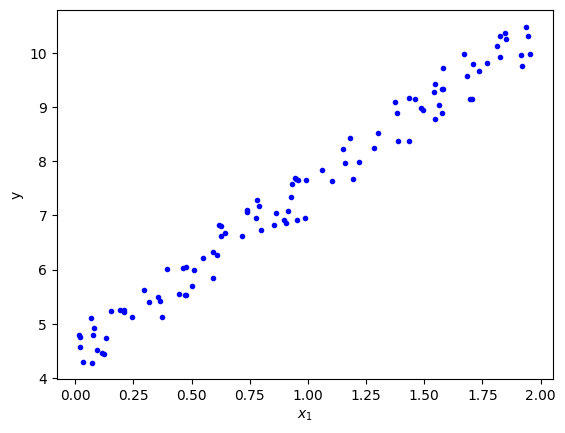

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# 임의의 데이터 및 레이블을 생성
x = 2 * np.random.rand(100,1)
y = 4+ 3*x+np.random.rand(100,1)

# 데이터 시각화
m = plt.plot(x,y, 'b.') 
plt.ylabel('y')
plt.xlabel('$x_{1}$')

수업시간 때 배운 Least-square solution을 이용해 아래의 theta_opt를 찾아주면 됩니다. (슬라이드 참고)

In [3]:
X_b = np.c_[np.ones((100,1)), x]
theta_opt = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
# 선으로 시각화
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b @ theta_best

plt.plot(X_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0,2,0,11])
plt.xlabel('$x_{1}$')
plt.ylabel('y')

NameError: name 'theta_best' is not defined

# Classification
분류 문제에서는 선형 SVM을 이용해 클래스를 구분하는 예제를 진행해보도록 하겠습니다.

In [6]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bf/15/d1b649fc7685d11b806b4546a5438191fb2ad761de70da95ff676189dcec/scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 406.7 kB/s eta 0:00:0000:0100:03
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 542.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 848.3 kB/s eta 0:00:000:0100:01m


In [7]:
# soft margin Classification -> allow errors
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 붓꽃 데이터셋 로드
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width 만 데이터로 이용
print(X.shape)
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
print(y.shape)

(150, 2)
(150,)


In [8]:
# 선형 SVM 모델 적용
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge")) # C smaller, wider street
])

/home2/dwnusa/workspace/cnnstudy/venv/lib64/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


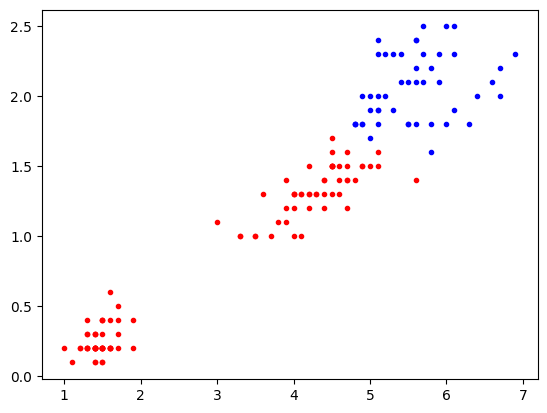

In [9]:
# 분류 결과 시각화
import matplotlib.pyplot as plt
svm_clf.fit(X, y)
for point in X:
  prediction = svm_clf.predict([point])
  if prediction == 1.:
    plt.plot(point[0], point[1], 'b.')
  else:
    plt.plot(point[0], point[1], 'r.')